In [1]:
import numpy as np
import pandas as pd 

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [6]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [7]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [8]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [9]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True).astype(int)

In [11]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0


In [12]:
df.dtypes

CreditScore          int64
Age                  int64
Tenure               int64
Balance              int64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary      int64
Exited               int64
Geography_Germany    int64
Geography_Spain      int64
Gender_Male          int64
dtype: object

In [13]:
X = df.drop(columns=['Exited'])
y = df['Exited']

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [15]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2694,628,29,3,113146,2,0,1,124749,1,0,1
5140,626,29,4,105767,2,0,0,41104,0,0,0
2568,612,47,6,130024,1,1,1,45750,1,0,0
3671,646,52,6,111739,2,0,1,68367,1,0,0
7427,714,33,8,122017,1,0,0,162515,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2895,621,47,7,107363,1,1,1,66799,1,0,1
7813,684,63,3,81245,1,1,0,69643,1,0,0
905,672,45,9,0,1,1,1,92027,0,0,0
5192,663,39,8,0,2,1,1,101168,0,0,0


In [16]:
y_train

2694    0
5140    0
2568    1
3671    0
7427    0
       ..
2895    0
7813    1
905     1
5192    0
235     1
Name: Exited, Length: 8000, dtype: int64

In [17]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [18]:
import tensorboard
import keras
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [19]:
model = Sequential()
model.add(Dense(11, activation='relu', input_dim=11))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\HP\Deep-Learning-CampusX\campus\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


This code defines a simple neural network with three layers:

* **Input Layer:**
  * Takes 11 input features.
* **First Hidden Layer:**
  * Contains 11 neurons.
  * Uses the ReLU activation function.
* **Second Hidden Layer:**
  * Contains 11 neurons.
  * Uses the ReLU activation function.
* **Output Layer:**
  * Contains 1 neuron.
  * Uses the sigmoid activation function.

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [22]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6820 - loss: 0.5917 - val_accuracy: 0.8025 - val_loss: 0.4641
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7974 - loss: 0.4648 - val_accuracy: 0.8119 - val_loss: 0.4410
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8099 - loss: 0.4352 - val_accuracy: 0.8144 - val_loss: 0.4277
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8210 - loss: 0.4236 - val_accuracy: 0.8169 - val_loss: 0.4189
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8182 - loss: 0.4147 - val_accuracy: 0.8200 - val_loss: 0.4109
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8298 - loss: 0.4060 - val_accuracy: 0.8281 - val_loss: 0.4002
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8302 - loss: 0.3963 - val_accuracy: 0.8356 - val_loss: 0.3916
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8390 - loss: 0.3836 - val_accu

In [23]:
model.layers[0].get_weights()

[array([[ 0.12322648, -0.15472019,  0.05785113,  0.41124418, -0.04609566,
         -0.09312687,  0.61445534,  0.08133774,  0.211202  ,  0.5546953 ,
          0.05652258],
        [-0.81510705,  0.03058885, -0.01367156,  0.54610974, -0.29371175,
         -0.1342419 , -0.5335844 , -0.590092  , -0.48509333,  0.41665787,
         -0.9485084 ],
        [-0.0064446 , -0.08207276, -0.0330205 ,  0.21869364, -0.31413472,
         -0.12852629, -0.17174734,  0.06075466,  0.0832059 ,  0.24968427,
         -0.17390321],
        [ 0.51935244,  0.8568621 ,  0.12310463, -0.684133  , -0.27122793,
         -0.29165137,  0.00721575,  0.62655884,  0.7987926 ,  0.05505387,
         -0.28187054],
        [-0.00740107,  0.5562257 ,  1.2177764 ,  0.03432357,  0.00711585,
         -1.1309452 , -1.1781914 , -0.26666495, -0.5494775 , -0.41243368,
          0.142053  ],
        [ 0.3553739 , -0.00144749,  0.10263453,  0.10109997, -0.6301167 ,
         -0.00696709, -0.41761312, -0.16536455,  0.28574097,  0.2239631

In [24]:
model.layers[1].get_weights()

[array([[ 6.15762532e-01, -7.50307977e-01,  4.30092901e-01,
          3.82839799e-01,  3.24704021e-01,  2.82337129e-01,
         -1.53680950e-01,  2.84680694e-01,  4.26215380e-01,
          1.65000945e-01, -1.06247380e-01],
        [-1.80279419e-01,  2.20154032e-01,  2.74512947e-01,
          4.01455373e-01, -4.33915019e-01, -1.08810496e+00,
         -2.10931167e-01,  4.45419848e-01,  1.86099887e-01,
         -1.00554872e+00,  3.48450422e-01],
        [-4.35681731e-01,  4.80664939e-01, -6.16384268e-01,
          8.92982006e-01, -3.09066892e-01,  3.42800826e-01,
         -4.37215090e-01,  5.96540153e-01, -3.52759451e-01,
          3.53448913e-02, -5.02557814e-01],
        [-5.14413238e-01, -2.18847822e-02,  4.45206970e-01,
          5.81822097e-01,  6.26261175e-01,  2.45525464e-02,
          3.29145700e-01,  4.19537902e-01, -1.87511206e-01,
          1.68598577e-01,  3.33971918e-01],
        [ 8.89329091e-02,  2.29220957e-01, -8.11321735e-01,
          3.83718371e-01,  2.44637012e-01, -

In [25]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [26]:
y_pred = np.where(y_log>0.5,1,0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.862

In [28]:
import matplotlib.pyplot as plt

In [29]:
history.history

{'accuracy': [0.7581250071525574,
  0.801562488079071,
  0.8096874952316284,
  0.8145312666893005,
  0.8196874856948853,
  0.8260937333106995,
  0.8314062356948853,
  0.8404687643051147,
  0.8464062213897705,
  0.8493750095367432,
  0.8510937690734863,
  0.8542187213897705,
  0.8537499904632568,
  0.8542187213897705,
  0.8564062714576721,
  0.8557812571525574,
  0.8568750023841858,
  0.8592187762260437,
  0.8598437309265137,
  0.859375,
  0.8581249713897705,
  0.8579687476158142,
  0.858593761920929,
  0.8609374761581421,
  0.8592187762260437,
  0.8584374785423279,
  0.858593761920929,
  0.8614062666893005,
  0.8590624928474426,
  0.8607812523841858,
  0.860156238079071,
  0.8606250286102295,
  0.8607812523841858,
  0.8615624904632568,
  0.8621875047683716,
  0.8620312213897705,
  0.8621875047683716,
  0.8631250262260437,
  0.8642187714576721,
  0.8628125190734863,
  0.8637499809265137,
  0.8629687428474426,
  0.864062488079071,
  0.8659374713897705,
  0.8645312786102295,
  0.86328125,

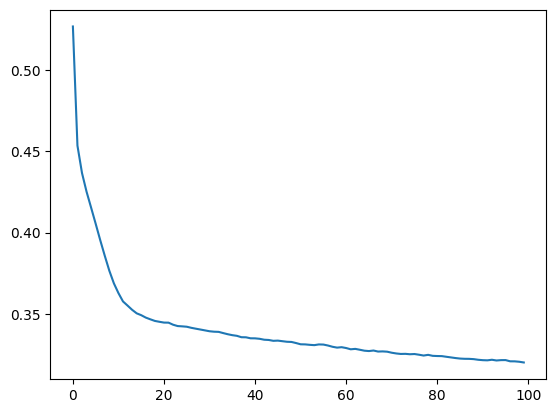

In [30]:
plt.plot(history.history['loss'])

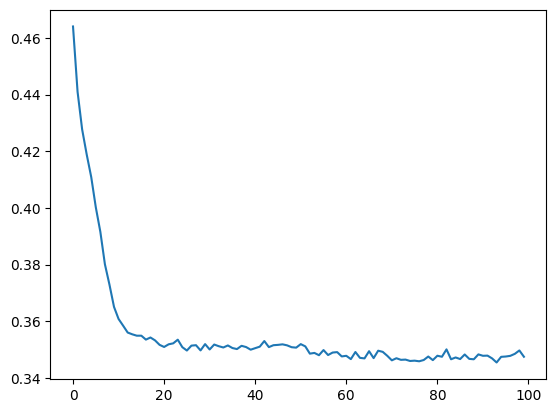

In [31]:
plt.plot(history.history['val_loss'])

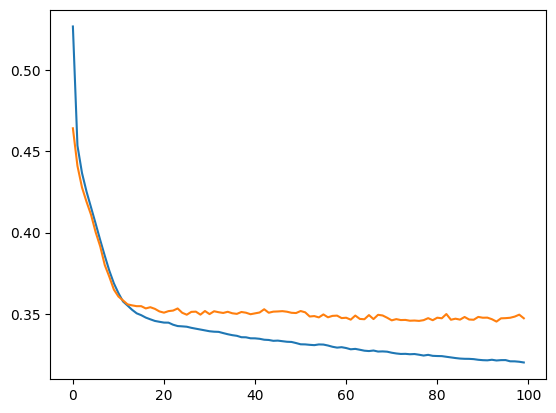

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

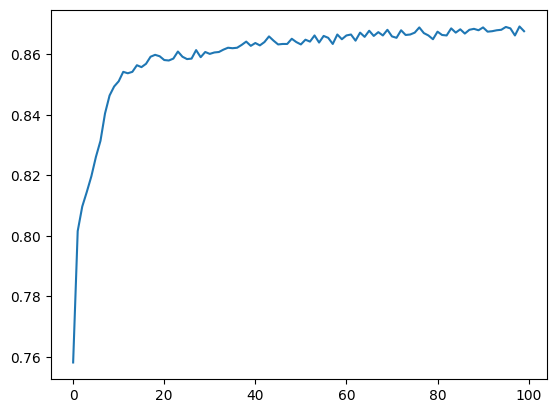

In [33]:
plt.plot(history.history['accuracy'])

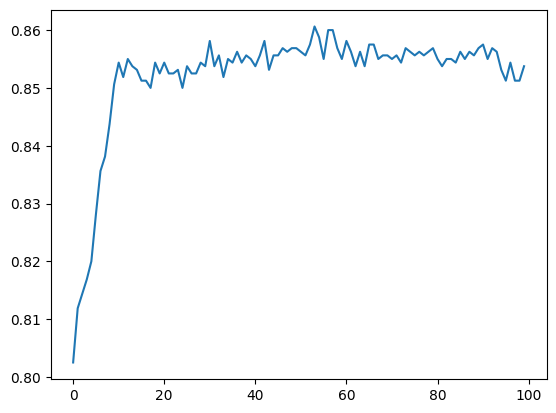

In [34]:
plt.plot(history.history['val_accuracy'])

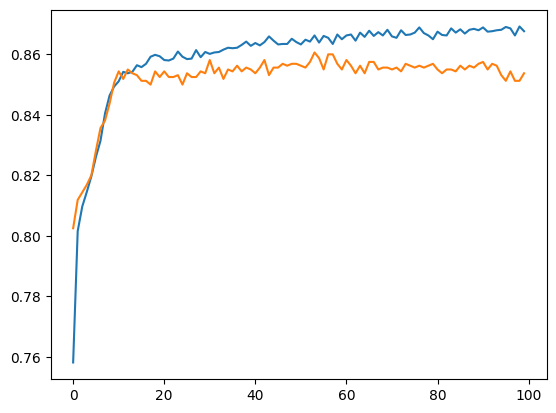

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])